## Read Data

In [2]:
!gdown --id 15OTTjXXZsj-wp-2aC91kRXVjF7i5r5lj

Downloading...
From: https://drive.google.com/uc?id=15OTTjXXZsj-wp-2aC91kRXVjF7i5r5lj
To: /content/iris_full.csv
100% 2.06k/2.06k [00:00<00:00, 868kB/s]


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#Read Data
iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :4]
X = torch.tensor(X)
y = iris[:, 4:]
y = torch.tensor(y)
m = X.shape[0]

In [4]:
class Logistic_Regression:
    def __init__(self, X, y):
        #intercept
        intercept = torch.ones((X.shape[0], 1))
        X = torch.cat([X, intercept], dim=1)

        # shuffle
        inds = torch.randperm(X.shape[0])
        self.X = X[inds].float()
        self.y = y[inds].float()

        self.losses = []
        self.accs   = []

    def run_al(self, lr, num_iter, bz, theta):
        for i in range(num_iter):

            for i in range(0, m, bz):
                xi = self.X[i:i+bz]
                yi = self.y[i:i+bz]

                # predict z
                y_hat = predict(xi, theta)

                # compute loss
                loss = loss_function(y_hat, yi)

                # compute mean of gradient
                gradient = compute_gradient(xi, y_hat, yi)
                theta -= lr*gradient    
                #print('new theta: ', theta)

                # for debug
                if(i%1 == 0):
                    # loss
                    self.losses.append(loss)
                    
                    # accuracy for training
                    preds = predict(xi, theta).round()
                    acc = torch.where(preds == yi, 1., 0.).mean()
                    self.accs.append(acc)              

        # show figures
        plt.plot(self.losses)
        plt.show()


In [5]:
def sigmoid_function(z):
    return 1 / (1 + torch.exp(-z))

def loss_function(h, y):
    return (-y*torch.log(h) - (1-y)*torch.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(torch.mm(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return torch.mm(X.T, (y_hat - y)) / y.shape[0]

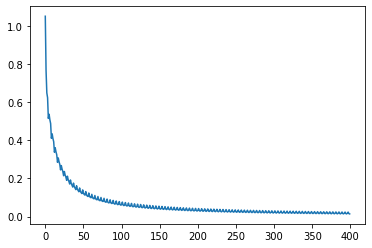

In [6]:
#init
LR = Logistic_Regression(X,y)
#hyper_parameter
lr=0.1
num_iter=100
bz=32

theta = torch.tensor([[0.1, 0.5, 0.1, 0.5, -0.1]]).float().T
LR.run_al(lr, num_iter, bz, theta)

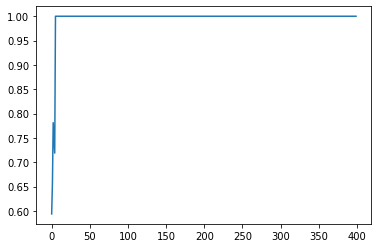

In [7]:
plt.plot(LR.accs)
plt.show()